In [ ]:
"""
MatSoc: Intro to ML Techniques
Assignment 1
Deadline: Wednesday, 27 December 2023, 23:59 IST

Name: Teesha Mittal
Roll Number: 211104
IITK Email: teesham21@iitk.ac.in

Part A:

I.

1. Plot x vs y scatter plot for the given dataset
2. Plot the histogram of the y values
3. Clean the data by removing outliers and nan value containing datapoints
4. Plot a histogram for y values before and after cleaning the data.
5. Split the data into train and test with 85% of the data used for training

II.

1. Implement the following function:

  def gradient_descent(x,y,alpha=learning_rate,epochs=number of iteratrions)

  The function should return two parameter values (a,b)
  corresponding to the model  ŷ=a*x+b

2. Plot the histogram with the residuals (y- ŷ) after model training for the
   original and predicted values

3. Plot the  ŷ vs x (line chart), preferrably on top of a y vs x scatter plot

  Note that the code for all of part A must be visible

  Preferrably use pandas for data cleaning and matplotlib for plotting

  Make sure all the code is run before you submit the notebook

Part B:

    1. Report the parameter values after training on the given data
       the target variable is 'y' and there is only one feature 'x'
    2. Report the MSE value for your model after training
    3. What do you think is the ideal ratio for train data if we are splitting
       the data into train and test datasets? Is the answer same irrespective of
       the size of the dataset? What percent would you take for training
       if your dataset has 1 feature, 1 target and 250 data points, what would
       you do if it had 10,000 data points instead of 250 data points

      Note that there is no single correct answer for part B

"""

In [4]:
" Part A"
"I"
"1."

'1.'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [53]:
# Loading the dataset into a pandas DataFrame
data= pd.read_csv('data.csv')

In [10]:
data

,Unnamed: 0,x,y
0,0,2,43.00
1,1,3,55.48
2,2,4,68.08
3,3,5,79.24
4,4,5,79.24
...,...,...,...
994,994,994,11948.08
995,995,996,11971.24
996,996,997,11984.08
997,997,998,11994.64


In [12]:
# Extracting 'x' and 'y' columns
x=data['x']
y=data['y']

In [8]:
x

0         2
1         3
2         4
3         5
4         5
       ... 
994     994
995     996
996     997
997     998
998    1001
Name: x, Length: 999, dtype: int64

In [9]:
y

0         43.00
1         55.48
2         68.08
3         79.24
4         79.24
         ...   
994    11948.08
995    11971.24
996    11984.08
997    11994.64
998    12029.92
Name: y, Length: 999, dtype: float64

Text(0, 0.5, 'y')

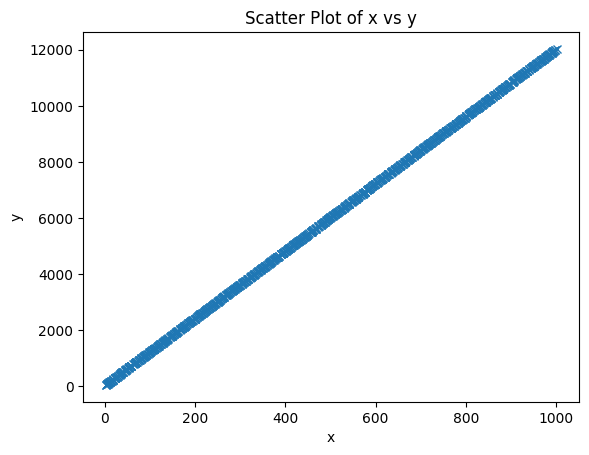

In [13]:
plt.plot(x,y,'x')
plt.title('Scatter Plot of x vs y')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
"2. Histogram of y values before cleaning the data"

In [14]:
y_values=data['y']

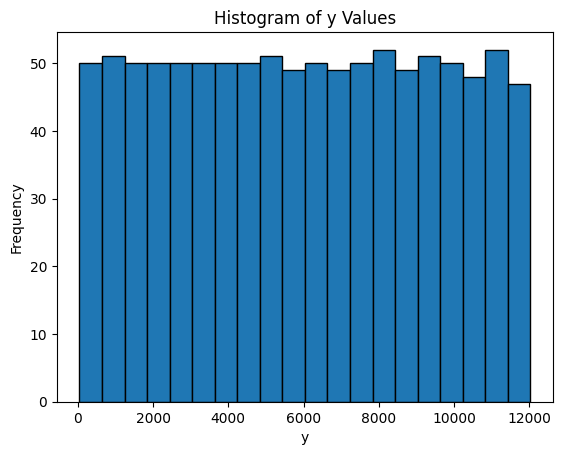

In [15]:
plt.hist(y_values, bins=20, edgecolor='black')
plt.title('Histogram of y Values')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.show()

In [ ]:
"3."

In [17]:
# Removes rows with NaN values in any column
cleaned_data = data.dropna()

In [18]:
threshold = 3

In [19]:
z_scores = stats.zscore(data['y'])

In [21]:
# comparing z-score and threshold indicates
outlier_indices = (abs(z_scores) > threshold)

In [52]:
# Removing outliers
cleaned_data=cleaned_data[~outlier_indices]

In [ ]:
"4. Histogram of y values after cleaning the data"

In [24]:
new_y_values=cleaned_data['y']

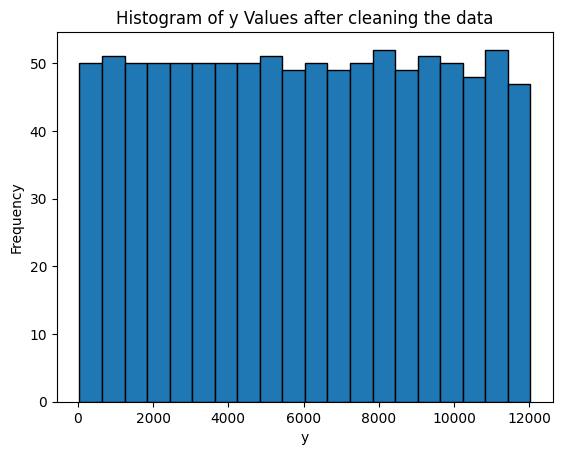

In [25]:
plt.hist(new_y_values, bins=20, edgecolor='black')
plt.title('Histogram of y Values after cleaning the data')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.show()

In [ ]:
"5."

In [26]:
# Splitting the data into features and target variable
X = data.drop('y', axis=1) # Features
Y = data['y'] # target variable

In [27]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [28]:
X_train

,Unnamed: 0,x
299,299,300
940,940,940
312,312,312
774,774,775
296,296,297
...,...,...
106,106,108
270,270,271
860,860,861
435,435,436


In [29]:
Y_train

299     3618.76
940    11298.64
312     3763.84
774     9318.40
296     3583.24
         ...   
106     1316.08
270     3271.60
860    10350.40
435     5249.92
102     1255.24
Name: y, Length: 849, dtype: float64

In [30]:
X_test

,Unnamed: 0,x
453,453,456
793,793,794
209,209,210
309,309,310
740,740,740
...,...,...
819,819,821
351,351,352
835,835,836
298,298,300


In [31]:
Y_test

453     5491.96
793     9546.28
209     2538.28
309     3737.92
740     8899.12
         ...   
819     9871.48
351     4243.36
835    10051.84
298     3618.76
765     9211.72
Name: y, Length: 150, dtype: float64

In [ ]:
"II"
"1."

In [51]:
# Normalizing the input data
x_mean = np.mean(x)
x_std = np.std(x)
y_mean = np.mean(y)
y_std = np.std(y)

x_normalized = (x - x_mean) / x_std
y_normalized = (y - y_mean) / y_std

def gradient_descent(x_normalized, y_normalized, alpha=0.01, epochs=1000):
    a = 0  # initial value for slope
    b = 0  # initial value for intercept
    n = float(len(x))  # number of elements in x

    for i in range(epochs):
        # Predictions with current values of a and b
        y_pred = a * x_normalized + b

        # Partial derivatives of a and b with respect to the loss function
        grad_a = (-2/n) * sum(x_normalized * (y_normalized - y_pred))
        grad_b = (-2/n) * sum(y_normalized - y_pred)

        if (grad_a != grad_a) or (grad_b != grad_b):
            print("Divergence detected.")
            break
        # Updating a and b using the gradients and learning rate
        a -= alpha * grad_a
        b -= alpha * grad_b

    return a, b

In [34]:
gradient_descent(x_normalized, y_normalized, alpha=0.01, epochs=1000)

(0.9999999798976549, 1.1075596423754518e-16)

In [ ]:
"2."

In [41]:
# Creating a linear regression model
model = LinearRegression()

In [42]:
# Training the model
model.fit(X_train, Y_train)

LinearRegression()

In [38]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [40]:
# Calculating residuals
residuals = Y_test - y_pred

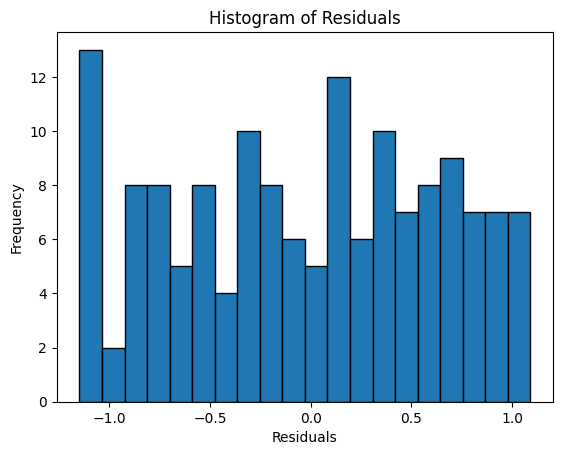

In [43]:
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [ ]:
"3."

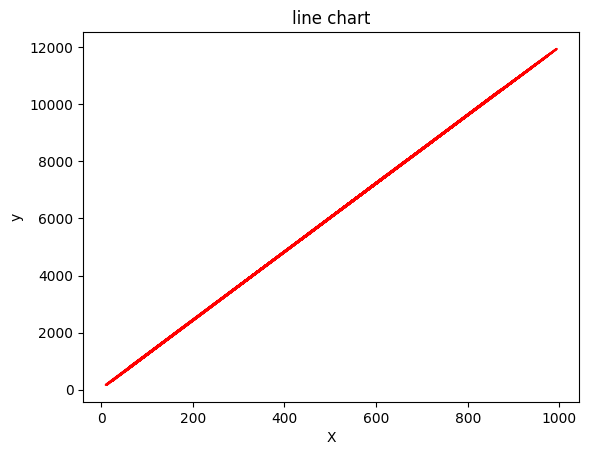

In [44]:
plt.plot(X_test, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('line chart')
plt.show()

In [ ]:
"PART-B:"
"1."

In [45]:
slope = model.coef_[0] # Slope(coefficient)
intercept = model.intercept_ # intercept

In [46]:
slope

0.004128447160592005

In [47]:
intercept

19.08307753104509

In [ ]:
"slope=0.00412 , intercept=19.0830"

In [ ]:
"2."

In [48]:
# Calculating Mean Squared Error
mse = mean_squared_error(Y_test, y_pred)

In [49]:
mse

0.4246273940384976

In [54]:
"Mean Squared Error (MSE) = 0.424627"

'Mean Squared Error (MSE) = 0.424627'

In [ ]:
"3."

In [ ]:
"""
 I think ideal ratio is 80-20% training data.
 Above answer can vary depending upon the size of the dataset.
 If the dataset has 1 feature 1 target and 250 data points, I might take 70-80% data for training.
 And if the dataset has 10,000 data points, I might take 80-90% data for training because increase in data
 points provide ample information for the model to learn from and thus allows more samples to be dedicated to training.

"""